# The problem statement is to understand the drive of employee churn, which employee are going to quit the job.

##Also which strategies can be used to improve the retention of the employee 
###And the indicators used to determine the employee leaving the company.

In [1]:
# importing libraries for data visualisations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In C:\Users\USER\Documents\books\Happy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\USER\Documents\books\Happy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\USER\Documents\books\Happy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\USER\Documents\books\Happy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\USER\Documents\books\Happy\lib\site-

In [2]:
# Read Excel file
df_HR = pd.read_csv('C:/Users/USER/Downloads/HR-Employee-Attrition.csv')


print("Shape of dataframe is: {}".format(df_HR.shape))

Shape of dataframe is: (1470, 35)


In [3]:
#Check the first ten rows of the dataset

df_HR.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [4]:
# Create a copy of the original file 
df_HR1 = df_HR.copy()

In [5]:
#Let's get to view the columns of the copy of the main dataset 

df_HR1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
##check the first 5 rows of the dataset

df_HR1.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [7]:
##Group the dataset to integer and object 

df_HR1.columns.to_series().groupby(df_HR1.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [8]:
# Columns data types and missing values
df_HR1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#Numerical overview

df_HR1.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

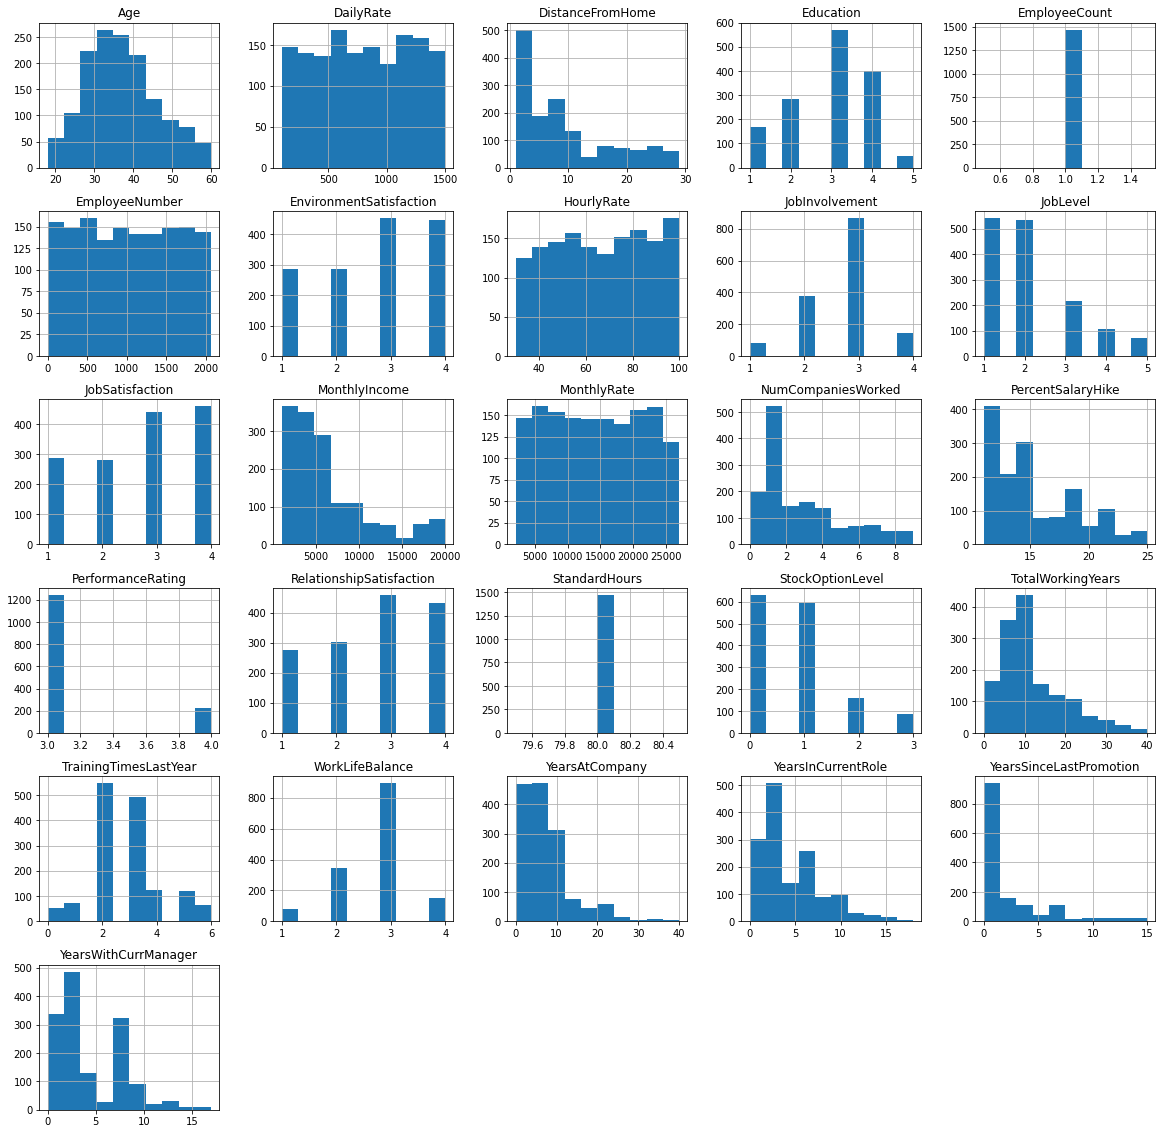

In [10]:
##Histogram plot of the features of the dataset

df_HR1.hist(figsize=(20,20))
plt.show()

In [11]:
#Importing the scientific python library for norm, skewness and statistics 

from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [12]:
#Check for the mean(mu) and standard deviation(sigma) 

(mu, sigma) = norm.fit(df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR1.loc[df_HR1['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


Education

In [13]:
# Education Field of employees
df_HR1['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [14]:
#This is to note the percentage no of employees based on their Education field that would be leaving the company 
#create a collection of series 
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])

#It means that your loop starts from zero(0)
i=0 
for field in list(df_HR1['EducationField'].unique()):
    ratio = df_HR1[(df_HR1['EducationField']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
print(df_EF)

                  % of Leavers
Field                         
Human Resources      25.925926
Life Sciences        14.686469
Marketing            22.012579
Medical              13.577586
Other                13.414634
Technical Degree     24.242424


<AxesSubplot:title={'center':'Leavers by Education Field (%)'}, xlabel='Field'>

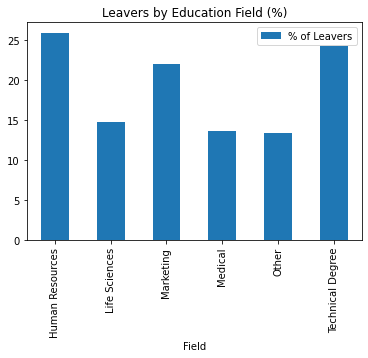

In [15]:
#Show the plot 

df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

In [16]:
# Gender of employees
df_HR1['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [17]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_HR1[(df_HR1['Attrition'] == 'Yes') & (
    df_HR1['Gender'] == 'Male')].shape[0] / df_HR1[df_HR1['Gender'] == 'Male'].shape[0])*100, (df_HR1[(df_HR1['Attrition'] == 'Yes') & (df_HR1['Gender'] == 'Female')].shape[0] / df_HR1[df_HR1['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


<AxesSubplot:title={'center':'Leavers by Gender (%)'}, xlabel='Gender'>

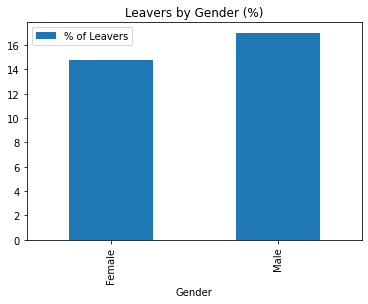

In [18]:
#This is to note the percentage of the gender that would be leaving the company 

df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_HR1['Gender'].unique()):
    ratio = df_HR1[(df_HR1['Gender']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.plot(kind='bar',title='Leavers by Gender (%)')

In [19]:
# Marital Status of employees
df_HR1['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [20]:
#This is to note the percentage of the marital status that would be leaving the company 
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_HR1['MaritalStatus'].unique()):
    ratio = df_HR1[(df_HR1['MaritalStatus']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
print(df_MF)

                % of Leavers
Marital Status              
Divorced           10.091743
Married            12.481426
Single             25.531915


<AxesSubplot:title={'center':'Leavers by MaritalStatus (%)'}, xlabel='Marital Status'>

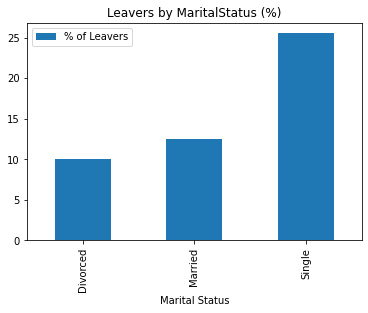

In [21]:
#Show the plot 

df_MF.plot(kind='bar',title='Leavers by MaritalStatus (%)')

In [22]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR1['DistanceFromHome'].min(),
                                                                                       df_HR1['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [23]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR1[df_HR1['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR1[df_HR1['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


In [24]:
from chart_studio import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go


Error importing optional module geopandas
Traceback (most recent call last):
  File "C:\Users\USER\Documents\books\Happy\lib\site-packages\_plotly_utils\optional_imports.py", line 28, in get_module
    return import_module(name)
  File "C:\Users\USER\Documents\books\Happy\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\USER\Documents\books\Happy\lib\site-packages\geopandas\__init__.py", line 1, in <module>
    from geopandas._config import options  # noqa
  File "C:\Users\USE

In [25]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'DistanceFromHome']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'DistanceFromHome']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Distance From Home Distribution in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 30], dtick=2))
# Plot
fig.show()

In [26]:
# The organisation consists of several departments
df_HR1['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [27]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df_HR1['Department'].unique()):
    ratio = df_HR1[(df_HR1['Department']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_DF = df_Department.groupby(by="Department").sum()
print(df_DF)

                        % of Leavers
Department                          
Human Resources            19.047619
Research & Development     13.839750
Sales                      20.627803


<AxesSubplot:title={'center':'Leavers by Department (%)'}, xlabel='Department'>

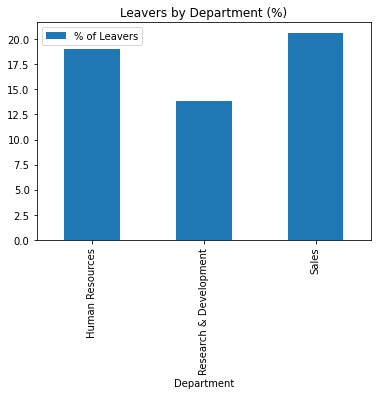

In [28]:
df_DF.plot(kind='bar',title='Leavers by Department (%)')

In [29]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df_HR1['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [30]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df_HR1['BusinessTravel'].unique()):
    ratio = df_HR1[(df_HR1['BusinessTravel']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
print(df_BT)

                   % of Leavers
Business Travel                
Non-Travel             8.000000
Travel_Frequently     24.909747
Travel_Rarely         14.956855


<AxesSubplot:title={'center':'Leavers by Business Travel (%)'}, xlabel='Business Travel'>

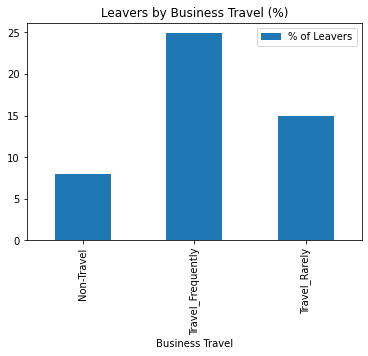

In [31]:
df_BT.plot(kind='bar',title='Leavers by Business Travel (%)')

In [32]:
# Employees in the database have several roles on-file
df_HR1['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [33]:
### This is to note the percentage of the Job role that would be leaving the company

df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df_HR1['JobRole'].unique()):
    ratio = df_HR1[(df_HR1['JobRole']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
print(df_JR)

                           % of Leavers
Job Role                               
Healthcare Representative      6.870229
Human Resources               23.076923
Laboratory Technician         23.938224
Manager                        4.901961
Manufacturing Director         6.896552
Research Director              2.500000
Research Scientist            16.095890
Sales Executive               17.484663
Sales Representative          39.759036


<AxesSubplot:title={'center':'Leavers by Job Role (%)'}, xlabel='Job Role'>

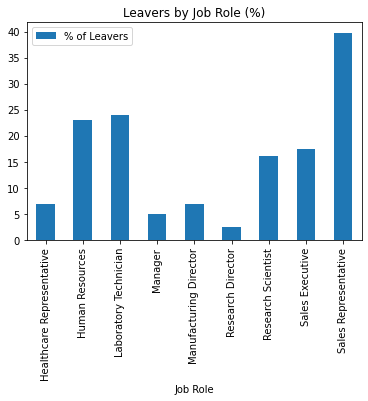

In [34]:
df_JR.plot(kind='bar',title='Leavers by Job Role (%)')

In [35]:
df_HR1['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [36]:
### This is to note the percentage of the Job level that would be leaving the company

df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df_HR1['JobLevel'].unique()):
    ratio = df_HR1[(df_HR1['JobLevel']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
print(df_JL)

           % of Leavers
Job Level              
1.0           26.335175
2.0            9.737828
3.0           14.678899
4.0            4.716981
5.0            7.246377


<AxesSubplot:title={'center':'Leavers by Job Level (%)'}, xlabel='Job Level'>

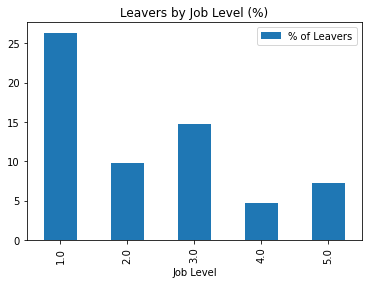

In [37]:
df_JL.plot(kind='bar',title='Leavers by Job Level (%)')

In [38]:
df_HR1['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [39]:
### This is to note the percentage of the Job involvement that would be leaving the company

df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df_HR1['JobInvolvement'].unique()):
    ratio = df_HR1[(df_HR1['JobInvolvement']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
print(df_JI)

                 % of Leavers
Job Involvement              
1.0                 33.734940
2.0                 18.933333
3.0                 14.400922
4.0                  9.027778


<AxesSubplot:title={'center':'Leavers by Job Involvement (%)'}, xlabel='Job Involvement'>

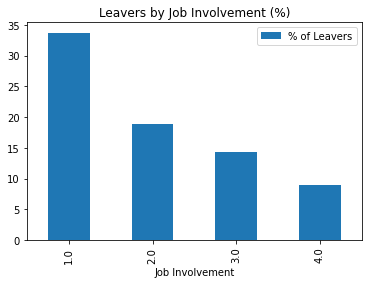

In [40]:
df_JI.plot(kind='bar',title='Leavers by Job Involvement (%)')

In [41]:
print("Number of training times last year varies from {} to {} years.".format(
    df_HR1['TrainingTimesLastYear'].min(), df_HR1['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


In [42]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'TrainingTimesLastYear']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'TrainingTimesLastYear']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Training Times Last Year metric in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 6], dtick=1))
fig.show()

In [43]:
df_HR1['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [44]:
### This is to note the percentage of the Number of companies worked that would be leaving the company

df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df_HR1['NumCompaniesWorked'].unique()):
    ratio = df_HR1[(df_HR1['NumCompaniesWorked']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
print(df_NC)

                      % of Leavers
Num Companies Worked              
0.0                      11.675127
1.0                      18.809981
2.0                      10.958904
3.0                      10.062893
4.0                      12.230216
5.0                      25.396825
6.0                      22.857143
7.0                      22.972973
8.0                      12.244898
9.0                      23.076923


<AxesSubplot:title={'center':'Leavers by Num Companies Worked (%)'}, xlabel='Num Companies Worked'>

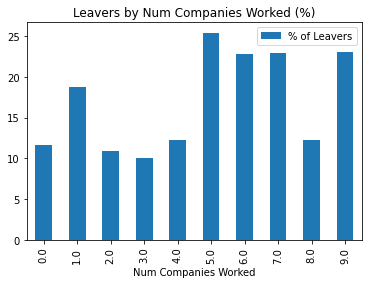

In [45]:
df_NC.plot(kind='bar',title='Leavers by Num Companies Worked (%)')

In [46]:
df_HR1

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [47]:
print('Average Number of Years at the company for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df_HR1[df_HR1['Attrition'] == 'No']['YearsAtCompany'].mean(), df_HR1[df_HR1['Attrition'] == 'Yes']['YearsAtCompany'].mean()))

Average Number of Years at the company for currently active employees: 7.37 miles and ex-employees: 5.13 years


In [48]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR1['YearsAtCompany'].min(), df_HR1['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


In [49]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'YearsAtCompany']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'YearsAtCompany']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years At Company in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))
# Plot
fig.show()

In [50]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_HR1['YearsInCurrentRole'].min(), df_HR1['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


In [51]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'YearsInCurrentRole']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'YearsInCurrentRole']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years InCurrent Role in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 18], dtick=1))
# Plot
fig.show()

In [52]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_HR1['YearsSinceLastPromotion'].min(), df_HR1['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


In [53]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'YearsSinceLastPromotion']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'YearsSinceLastPromotion']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years Since Last Promotion in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 15], dtick=1))
# Plot
fig.show()

In [54]:
print("Total working years varies from {} to {} years.".format(
    df_HR1['TotalWorkingYears'].min(), df_HR1['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


In [55]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'TotalWorkingYears']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'TotalWorkingYears']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Total Working Years in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))
# Plot
fig.show()

In [56]:
print('Average Number of Years wit current manager for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df_HR1[df_HR1['Attrition'] == 'No']['YearsWithCurrManager'].mean(), df_HR1[df_HR1['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Average Number of Years wit current manager for currently active employees: 4.37 miles and ex-employees: 2.85 years


In [57]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df_HR1['YearsWithCurrManager'].min(), df_HR1['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


In [58]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'YearsWithCurrManager']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'YearsWithCurrManager']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Years With Curr Manager in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 17], dtick=1))
# Plot
fig.show()

In [59]:
df_HR1['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [60]:
### This is to note the percentage of the work life balance that would be leaving the company

df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df_HR1['WorkLifeBalance'].unique()):
    ratio = df_HR1[(df_HR1['WorkLifeBalance']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
print(df_WLB)

                 % of Leavers
WorkLifeBalance              
1.0                 31.250000
2.0                 16.860465
3.0                 14.221725
4.0                 17.647059


<AxesSubplot:title={'center':'Leavers by WorkLifeBalance (%)'}, xlabel='WorkLifeBalance'>

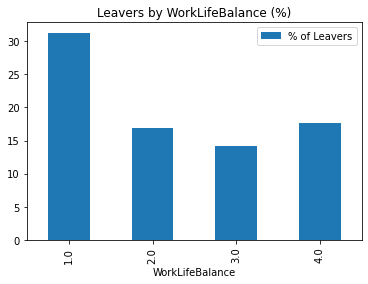

In [61]:
df_WLB.plot(kind='bar',title='Leavers by WorkLifeBalance (%)')

In [62]:
df_HR1['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [63]:
df_HR1['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [64]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df_HR1['OverTime'].unique()):
    ratio = df_HR1[(df_HR1['OverTime']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
print(df_OT)

          % of Leavers
OverTime              
No           10.436433
Yes          30.528846


<AxesSubplot:title={'center':'Leavers by OverTime (%)'}, xlabel='OverTime'>

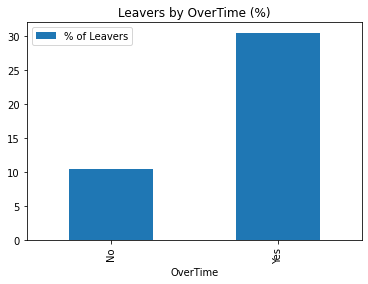

In [65]:
df_OT.plot(kind='bar',title='Leavers by OverTime (%)')

In [66]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df_HR1['HourlyRate'].min(), df_HR1['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [67]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df_HR1['DailyRate'].min(), df_HR1['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [68]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_HR1['MonthlyRate'].min(), df_HR1['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [69]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_HR1['MonthlyIncome'].min(), df_HR1['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


In [70]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'MonthlyIncome']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Monthly Income by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 20000], dtick=2000))
# Plot
fig.show()

In [71]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df_HR1['PercentSalaryHike'].min(), df_HR1['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


In [72]:
# Add histogram data
x1 = df_HR1.loc[df_HR1['Attrition'] == 'No', 'PercentSalaryHike']
x2 = df_HR1.loc[df_HR1['Attrition'] == 'Yes', 'PercentSalaryHike']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Percent Salary Hike by Attrition Status')
fig['layout'].update(xaxis=dict(range=[10, 26], dtick=1))
# Plot
fig.show()

In [73]:
print("Stock Option Levels varies from {} to {}.".format(
    df_HR1['StockOptionLevel'].min(), df_HR1['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [74]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_HR1[(df_HR1['Attrition'] == 'Yes') & (df_HR1['StockOptionLevel'] == 1)
          ].shape[0] / df_HR1[df_HR1['StockOptionLevel'] == 1].shape[0]*100,
    df_HR1[(df_HR1['Attrition'] == 'Yes') & (df_HR1['StockOptionLevel'] == 2)
          ].shape[0] / df_HR1[df_HR1['StockOptionLevel'] == 1].shape[0]*100,
    df_HR1[(df_HR1['Attrition'] == 'Yes') & (df_HR1['StockOptionLevel'] == 3)].shape[0] / df_HR1[df_HR1['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [75]:
### This is to note the percentage of the Stock option level that would be leaving the company

df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_HR1['StockOptionLevel'].unique()):
    ratio = df_HR1[(df_HR1['StockOptionLevel']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
print(df_SOL)

                  % of Leavers
StockOptionLevel              
0.0                  24.405705
1.0                   9.395973
2.0                   7.594937
3.0                  17.647059


<AxesSubplot:title={'center':'Leavers by Stock Option Level (%)'}, xlabel='StockOptionLevel'>

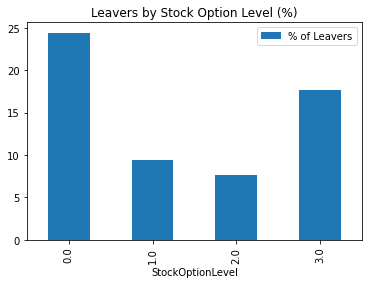

In [76]:
df_SOL.plot(kind='bar',title='Leavers by Stock Option Level (%)')

In [77]:
df_HR1['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [78]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR1['EnvironmentSatisfaction'].unique()):
    ratio = df_HR1[(df_HR1['EnvironmentSatisfaction']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
print(df_Env)

                         % of Leavers
EnvironmentSatisfaction              
1.0                         25.352113
2.0                         14.982578
3.0                         13.686534
4.0                         13.452915


<AxesSubplot:title={'center':'Leavers by Environment Satisfaction (%)'}, xlabel='EnvironmentSatisfaction'>

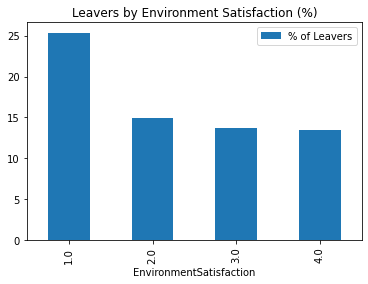

In [79]:
df_Env.plot(kind='bar',title='Leavers by Environment Satisfaction (%)')

In [80]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
df_HR1['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [81]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR1['JobSatisfaction'].unique()):
    ratio = df_HR1[(df_HR1['JobSatisfaction']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
print(df_JS)

                 % of Leavers
JobSatisfaction              
1.0                 22.837370
2.0                 16.428571
3.0                 16.515837
4.0                 11.328976


<AxesSubplot:title={'center':'Leavers by Job Satisfaction (%)'}, xlabel='JobSatisfaction'>

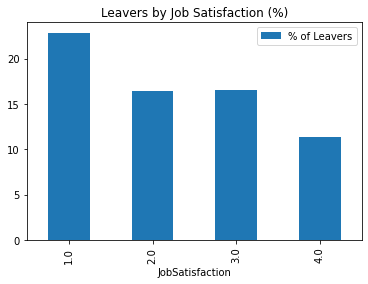

In [82]:
df_JS.plot(kind='bar',title='Leavers by Job Satisfaction (%)')

In [83]:
df_HR1['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [84]:
### This is to note the percentage of the relationship satisfaction that would be leaving the company

df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR1['RelationshipSatisfaction'].unique()):
    ratio = df_HR1[(df_HR1['RelationshipSatisfaction']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
print(df_RS)

                          % of Leavers
RelationshipSatisfaction              
1.0                          20.652174
2.0                          14.851485
3.0                          15.468410
4.0                          14.814815


<AxesSubplot:title={'center':'Leavers by Relationship Satisfaction (%)'}, xlabel='RelationshipSatisfaction'>

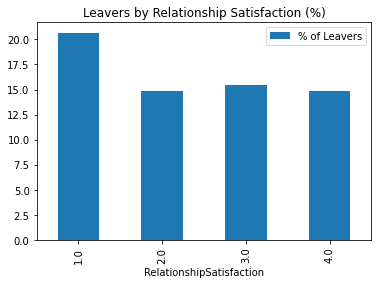

In [85]:
df_RS.plot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

In [86]:
df_HR1['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [87]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_HR1[(df_HR1['Attrition'] == 'Yes') & (df_HR1['PerformanceRating'] == 3)
          ].shape[0] / df_HR1[df_HR1['StockOptionLevel'] == 1].shape[0]*100,
    df_HR1[(df_HR1['Attrition'] == 'Yes') & (df_HR1['PerformanceRating'] == 4)].shape[0] / df_HR1[df_HR1['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In [88]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_HR1['PerformanceRating'].unique()):
    ratio = df_HR1[(df_HR1['PerformanceRating']==field)&(df_HR1['Attrition']=="Yes")].shape[0] / df_HR1[df_HR1['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
print(df_PR)

                   % of Leavers
PerformanceRating              
3.0                   16.077170
4.0                   16.371681


<AxesSubplot:title={'center':'Leavers by Performance Rating (%)'}, xlabel='PerformanceRating'>

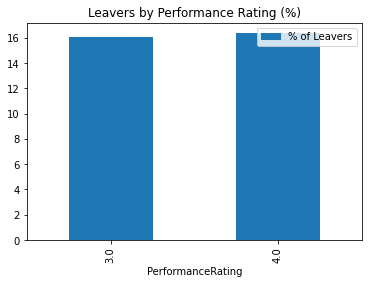

In [89]:
df_PR.plot(kind='bar',title='Leavers by Performance Rating (%)')

In [90]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [91]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR1[df_HR1['Attrition'] == 'No'].shape[0] / df_HR1.shape[0]*100,
    df_HR1[df_HR1['Attrition'] == 'Yes'].shape[0] / df_HR1.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [92]:
# Find correlations with the target and sort
df_HR_trans = df_HR1.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<AxesSubplot:>

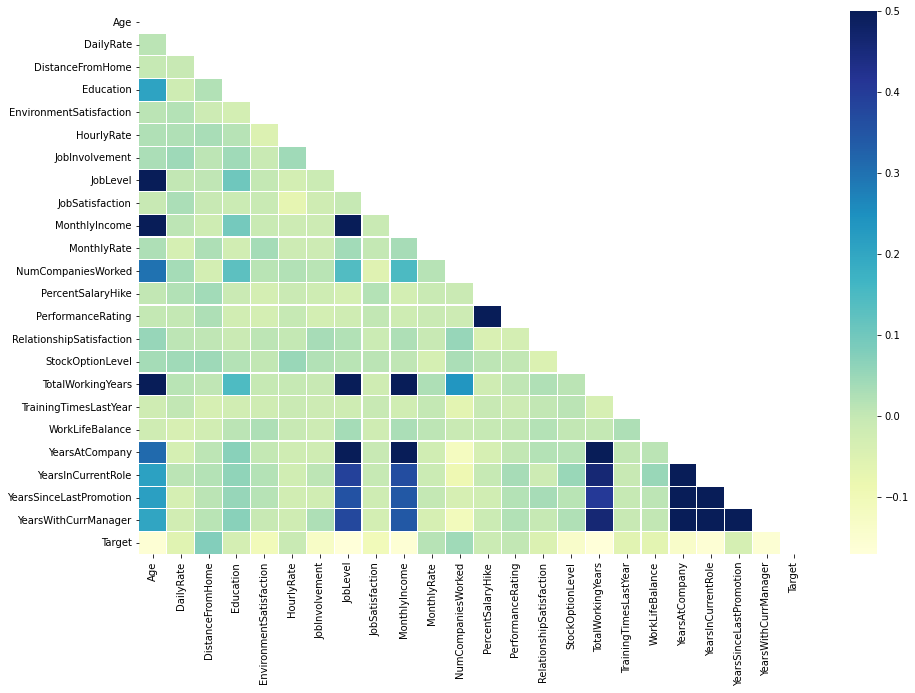

In [93]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [94]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [95]:
print(df_HR1.shape)
df_HR1.head()

(1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [96]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR1.columns[1:]:
    if df_HR1[col].dtype == 'object':
        if len(list(df_HR1[col].unique())) <= 2:
            le.fit(df_HR1[col])
            df_HR1[col] = le.transform(df_HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [97]:
# convert rest of categorical variable into dummy
df_HR1 = pd.get_dummies(df_HR1, drop_first=True)

In [98]:
print(df_HR1.shape)
df_HR1.head()

(1470, 49)


Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               2                        3       1          61  ...   
2               4                        4       1          92  ...   
3               5                        4       0          56  ...   
4               7                        1       1          40  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                             0                      0                     1  
1                             0                      1                     0  
2                             0                      0                     1  
3                             0                      1                     0  
4                             0                      1                     0  

[5 rows x 49 columns]

In [99]:
#Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. 
##Machine Learning algorithms perform better 
#when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR1.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR1[col] = df_HR1[col].astype(float)
    df_HR1[[col]] = scaler.fit_transform(df_HR1[[col]])
df_HR1['Attrition'] = pd.to_numeric(df_HR1['Attrition'], downcast='float')
df_HR1.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  2.738095        1.0   3.579098          0.000000       1.25            0.0   
1  3.690476        0.0   0.633500          1.250000       0.00            0.0   
2  2.261905        1.0   4.549034          0.178571       1.25            0.0   
3  1.785714        0.0   4.617037          0.357143       3.75            0.0   
4  1.071429        0.0   1.750179          0.178571       0.00            0.0   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0        0.000000                 1.666667     0.0    4.571429  ...   
1        0.002419                 3.333333     5.0    2.214286  ...   
2        0.007257                 5.000000     5.0    4.428571  ...   
3        0.009676                 5.000000     0.0    1.857143  ...   
4        0.014514                 0.000000     5.0    0.714286  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                      0.0                            0.0              0.0   
1                      0.0                            0.0              0.0   
2                      0.0                            5.0              0.0   
3                      0.0                            0.0              0.0   
4                      0.0                            5.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      5.0   
1                         5.0                      0.0   
2                         0.0                      0.0   
3                         5.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                           0.0                    0.0                   5.0  
1                           0.0                    5.0                   0.0  
2                           0.0                    0.0                   5.0  
3                           0.0                    5.0                   0.0  
4                           0.0                    5.0                   0.0  

[5 rows x 49 columns]

In [100]:
print('Size of Full Encoded Dataset: {}'. format(df_HR1.shape))

Size of Full Encoded Dataset: (1470, 49)


In [101]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = df_HR1['Attrition'].copy()

In [102]:
# let's remove the target feature and redundant features from the dataset
df_HR1.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_HR1.shape))

Size of Full dataset is: (1470, 44)


In [103]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_HR1,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


In [104]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [105]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0       Logistic Regression         82.03         8.06          74.49   
2                       SVM         78.88         8.21          84.48   
1             Random Forest         78.86         7.01          85.30   
5               Gaussian NB         75.06         5.10          68.14   
3                       KNN         66.42         9.90          84.21   
4  Decision Tree Classifier         58.02         6.23          76.22   

   Accuracy STD  
0          5.53  
2          4.18  
1          3.75  
5          3.14  
3          4.04  
4          4.23

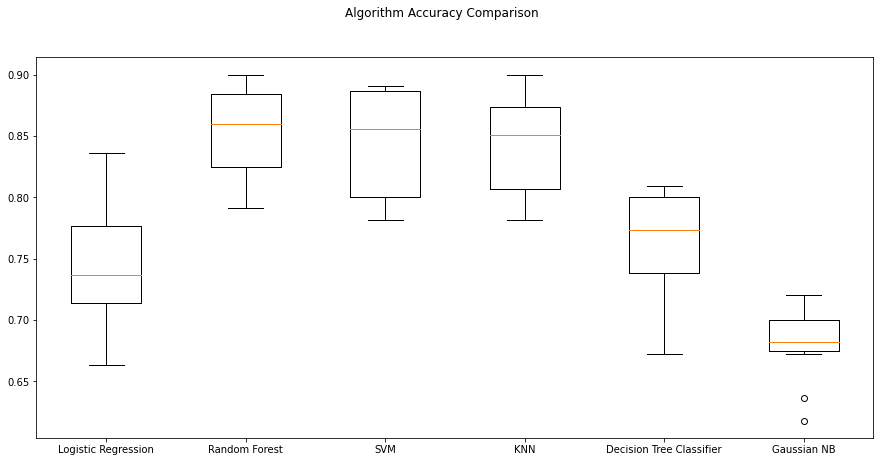

In [106]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

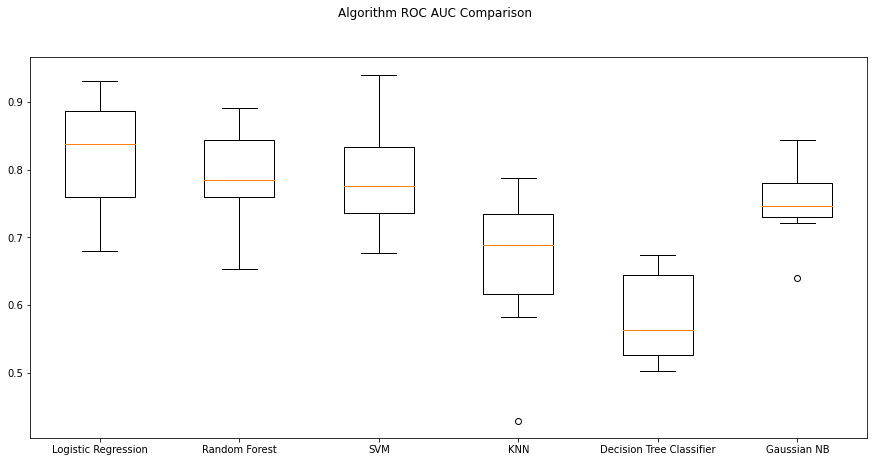

In [107]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [108]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.08)


In [109]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.10099999999999998, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.10099999999999998}
best score: 0.8154962538233308


Text(0.5, 257.44, 'Predicted label')

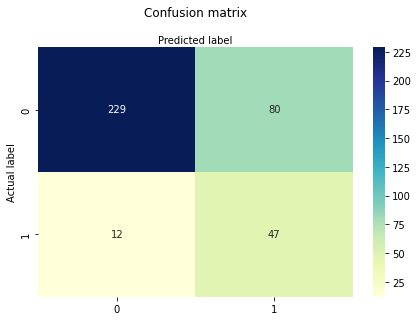

In [110]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 75.00


In [112]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       309
         1.0       0.37      0.80      0.51        59

    accuracy                           0.75       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.75      0.78       368



In [113]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


In [114]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 125}
best score: 0.7905198965981904


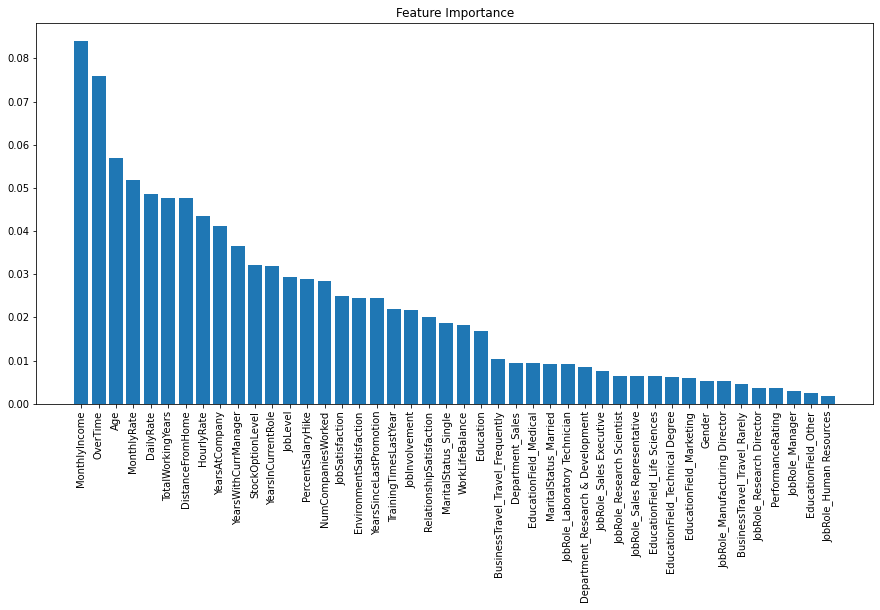

In [115]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [116]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Feature  Coefficient
0         MonthlyIncome     0.083965
1              OverTime     0.075856
2                   Age     0.056839
3           MonthlyRate     0.051796
4             DailyRate     0.048576
5     TotalWorkingYears     0.047657
6      DistanceFromHome     0.047653
7            HourlyRate     0.043477
8        YearsAtCompany     0.041187
9  YearsWithCurrManager     0.036449

In [117]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

In [118]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 86.68


In [119]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       309
         1.0       0.78      0.24      0.36        59

    accuracy                           0.87       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.86      0.87      0.84       368



In [120]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.822


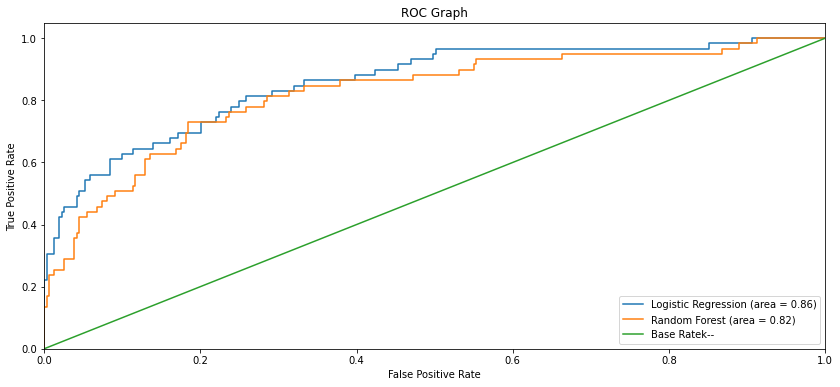

In [121]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()